# US Baby Names 1880–2010

National Data on the relative frequency of given names in the population of U.S. births where the individual has a Social Security Number (Tabulated based on Social Security records as of March 6, 2022)
For each year of birth YYYY after 1879, we created a comma-delimited file called yobYYYY.txt. Each record in the individual annual files has the format "name,sex,number," where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name. Each file is sorted first on sex and then on number of occurrences in descending order. When there is a tie on the number of occurrences, names are listed in alphabetical order. This sorting makes it easy to determine a name's rank. The first record for each sex has rank 1, the second record for each sex has rank 2, and so forth.
To safeguard privacy, we restrict our list of names to those with at least 5 occurrences.

In [1]:
import pandas as pd
import numpy as np

# Extracting data

In [2]:
names1880= pd.read_csv("babynames/yob1880.txt", names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


These files only contain names with at least five occurrences in each year, so for simplicity’s sake we can use the sum of the births column by sex as the total number of births in 1880:

In [3]:
names1880.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

Since the dataset is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further add a year field. You can do this using pandas.concat. Run the following in a Jupyter cell:

In [4]:
pieces= []
for year in range(1880,2011):
    path= f"babynames/yob{year}.txt"
    frame= pd.read_csv(path, names=["name", "sex", "births"])
    
    #Add a column for the year
    frame["year"]=year
    pieces.append(frame)

#Concatenate everything into a single DataFrame
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [5]:
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1929     Wiliam   M       5  1881
 1930     Wilton   M       5  1881
 1931       Wing   M       5  1881
 1932       Wood   M       5  1881
 1933     Wright   M       5  1881
 
 [1934 rows x 4 columns],
            name sex  births  year
 0          Mary   F    8148  1882
 1          Anna   F    3143  1882

There are a couple things to note here. First, concat combines the DataFrame objects by row by default. Second, it has to be passed ignore_index=True because we’re not interested in preserving the original row numbers returned from pandas.read_csv. So we now have a single DataFrame containing all of the names data across all 
years:

# Transforming the data

In [6]:
#pivot_table()

In [7]:
total_births= names.pivot_table("births", index="year", columns="sex", aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


# Visualizing the data

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

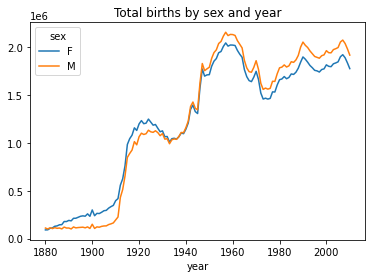

In [8]:
total_births.plot(title="Total births by sex and year")

Next, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. A  prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group:

# Transforming the data

In [9]:
def add_prop(group):
    group["prop"]= group["births"]/group["births"].sum()
    return group

names=names.groupby(["year","sex"]).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


When performing a group operation like this, it's often valuable to do a sanity check, like verifying that the prop column sums to 1 within all the groups:

In [10]:
#groupby()

In [11]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

Now that this is done, I’m going to extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another group operation:

In [12]:
#sort_values()

In [13]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped= names.groupby(["year", "sex"])
top1000=grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

We can drop the group index since we don't need it for our analysis:

In [14]:
#reset_index()

In [15]:
top1000= top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


# Analyzing Naming Trends

With the full dataset and the top one thousand dataset in hand, we can start analyzing various naming trends of interest. First, we can split the top one thousand names into the boy and girl portions:

In [17]:
boys= top1000[top1000["sex"] == "M"]
girls= top1000[top1000["sex"] == "F"]

In [18]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [19]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260871,Alaysia,F,252,2010,0.000142
260872,Aleigha,F,252,2010,0.000142
260873,Savanah,F,252,2010,0.000142
260874,Sky,F,252,2010,0.000142


Simple time series, like the number of Johns or Marys for each year, can be plotted but require some manipulation to be more useful. Let’s form a pivot table of the total number of births by year and name:

In [20]:
#pivot_table()

In [21]:
total_births= top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3745.0,NaN,8302.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2857.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3959.0,NaN,8942.0,NaN,NaN,314.0,NaN,349.0,468.0,...,NaN,4936.0,3039.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,957.0,4042.0,219.0,8542.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3448.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN


Now, this can be plotted for a handful of names with DataFrame’s plot method

In [22]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6870 entries, Aaden to Zuri
dtypes: float64(6870)
memory usage: 6.9 MB


In [23]:
subset=total_births[["John", "Harry", "Mary", "Marilyn"]]
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8178.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9428.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15170.0,414.0,4097.0,598.0
2007,14434.0,445.0,3688.0,598.0
2008,13326.0,381.0,3501.0,545.0


# Visualizing the data

A few boy and girl names over time

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

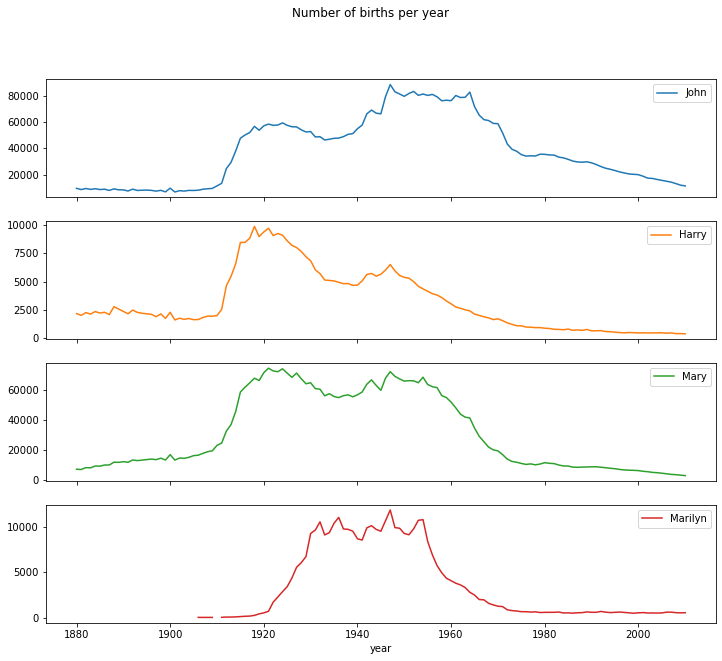

In [24]:
subset.plot(subplots=True, figsize=(12,10), title="Number of births per year")

On looking at this, it could be concluded that these names have grown out of favor with the American population. But the story is actually more complicated than that, as will be explored in the next section.

# Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed in the data. One measure is the proportion of births represented by the top 1,000 most popular names, which I aggregate and plot by year and sex.

Proportion of births represented in top one thousand names by sex

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

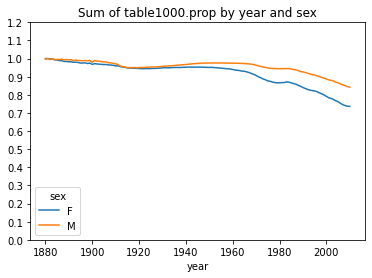

In [25]:
table= top1000.pivot_table("prop", index="year",columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2,13))

In [26]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753036,0.860285
2007,0.745834,0.855078
2008,0.740803,0.849967


You can see that, indeed, there appears to be increasing name diversity (decreasing total proportion in the top one thousand). Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. This number is trickier to compute. Let’s consider just the boy names from 2010:

In [27]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [28]:
df=boys[boys["year"]== 2010]
df

,name,sex,births,year,prop
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


# Transforming the data

After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a for loop to do this, but a vectorized NumPy way is more computationally efficient. Taking the cumulative sum, cumsum, of prop and then calling the method searchsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order:

In [29]:
#cumsum()

In [30]:
####Example

#The cumulative sum is not the cumulative sum of the values. Instead it is the cumulative sum of differences between the 
#values and the average.

#new_infections_per_day = [0, 1, 5, 10, 22, 5, 1]

#import numpy as np
#total_infections = np.cumsum(new_infections_per_day)
# Should produce: [0, 1, 6, 16, 38, 43, 44]

In [31]:
prop_cumsum= df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
            ...   
261871    0.842393
261872    0.842495
261873    0.842597
261874    0.842699
261875    0.842801
Name: prop, Length: 1000, dtype: float64

In [32]:
prop_cumsum[:10]

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065185
260883    0.073453
260884    0.081559
260885    0.089644
Name: prop, dtype: float64

In [33]:
#searchsorted()

In [34]:
prop_cumsum.searchsorted(0.5)

116

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was
much smaller:

In [35]:
df= boys[boys.year==1900]
ini1900= df.sort_values("prop", ascending=False).prop.cumsum()
ini1900

40876    0.065319
40877    0.122331
40878    0.170478
40879    0.206384
40880    0.233617
           ...   
41847    0.979525
41846    0.979578
41845    0.979631
41844    0.979685
41875    0.979738
Name: prop, Length: 1000, dtype: float64

In [36]:
ini1900.searchsorted(0.5)+1

25

You can now apply this operation to each year/sex combination, groupby those fields, and apply a function returning the count for each group:

In [59]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [37]:
def get_quantile_count(group, q=0.5):
    group= group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity=top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity=diversity.unstack()
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,210,99
2007,223,103
2008,234,109


In [38]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


Plot of diversity metric by year

<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

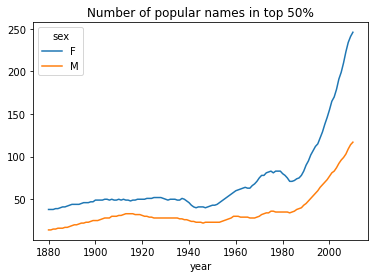

In [39]:
diversity.plot(title="Number of popular names in top 50%")

It's seen, girl names have always been more diverse than boy names, and they have only become more so over time. Further analysis of what exactly is driving the diversity, like the increase of alternative spellings, is left to the reader.

# The “last letter” revolution

In 2007, baby name researcher Laura Wattenberg pointed out that the distribution of boy names by final letter has changed significantly over the last 100 years. To see this, we first aggregate all of the births in the full dataset by year, sex, and final letter:

In [40]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


# Transforming the data

In [41]:
def get_last_letter(x):
    return x[-1]

last_letters= names["name"].map(get_last_letter)
last_letters.name="last_letter"

table= names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   39171.0   38858.0   37875.0   
b                NaN      NaN      NaN  ...   51015.0   49335.0   48127.0   
c                NaN      NaN      NaN  ...   27134.0   27266.0   27729.0   
d             1027.0   1298.0   1374.0  ...   60921.0   55941.0   53471.0   
e            54353.0  66748.0  66662.0  ...  145532.0  144801.0  144948.0   
f                NaN      NaN      NaN  ...    1759.0    1818.0    1821.0   
g               25.0     44.0     28.0  ...    2155.0    2085.0    2014.0   
h             7141.0   8630.0   8825.0  ...   86088.0   88200.0   88364.0   
i              105.0    141.0    134.0  ...   21048.0   23677.0   26070.0   
j                NaN      NaN      NaN  ...    1077.0    1088.0    1210.0   
k               19.0     21.0     22.0  ...   42500.0   42063.0   42324.0   
l             6174.0   7900.0   8395.0  ...  153847.0  153691.0  154101.0   
m               90.0    123.0    137.0  ...   42027.0   42727.0   42833.0   
n             5512.0   6832.0   7103.0  ...  616614.0  630890.0  664148.0   
o               97.0    134.0    142.0  ...   82204.0   83250.0   85500.0   
p                NaN      NaN      NaN  ...    3421.0    3164.0    2985.0   
q                NaN      NaN      NaN  ...     603.0     619.0     586.0   
r              910.0   1207.0   1214.0  ...  165481.0  164962.0  170025.0   
s             2803.0   3581.0   3569.0  ...  143972.0  139795.0  138803.0   
t             3140.0   3816.0   3784.0  ...

Then we select three representative years spanning the history and print the first few rows:

In [42]:
subtable= table.reindex(columns=[1910,1960,2010], level= "year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                 NaN     694.0     455.0    411.0    3910.0   39298.0
c                 5.0      49.0     957.0    482.0   15456.0   23360.0
d              6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e            133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

Next, normalize the table by total births to compute a new table containing the proportion of total births for each sex ending in each letter:

In [43]:
subtable.sum().unstack("year")

year,1910,1960,2010
sex,,,
F,396505.0,2022001.0,1776223.0
M,194209.0,2131990.0,1917416.0


In [44]:
letter_prop= subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e            0.336947  0.215138  0.178424  0.147599  0.083838  0.067969
f                 NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h            0.051530  0.036223  0.075998  0.045564  0.037912  0.051821
i            0.001526  0.039963  0.031698  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049374  0.018531
l            0.043187  0.033871  0.026391  0.065023  0.104892  0.070456
m            0.001200  0.008611  0.002599  0.058046  0.033831  0.024705
n            0.079237  0.130675  0.140052  0.143387  0.152513  0.362416
o            0.001672  0.002440  0.001247  0.017064  0.012841  0.042561
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006766  0.018047  0.064472  0.031044  0.087389
s            0.039036  0.012764  0.013337  0.130797  0.102699  0.065156
t            0.027432  0.015198  0.007839  0.072885  0.065646  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007707  0.016182
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116758  0.077345  0.161003  0.058203
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

With the letter proportions now in hand, we can make bar plots for each sex, broken down by year.

Proportion of boy and girl names ending in each letter

# Visualizing the data

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

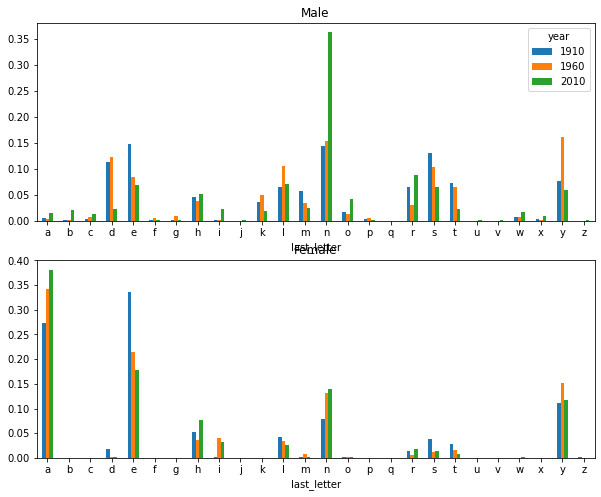

In [45]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male", legend=True)
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

As you can see, boy names ending in "n" have experienced significant growth since the 1960s. Going back to the full table created before, I again normalize by year and sex and select a subset of letters for the boy names, finally transposing  to make each column a time series:

In [46]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   39171.0   38858.0   37875.0   
b                NaN      NaN      NaN  ...   51015.0   49335.0   48127.0   
c                NaN      NaN      NaN  ...   27134.0   27266.0   27729.0   
d             1027.0   1298.0   1374.0  ...   60921.0   55941.0   53471.0   
e            54353.0  66748.0  66662.0  ...  145532.0  144801.0  144948.0   
f                NaN      NaN      NaN  ...    1759.0    1818.0    1821.0   
g               25.0     44.0     28.0  ...    2155.0    2085.0    2014.0   
h             7141.0   8630.0   8825.0  ...   86088.0   88200.0   88364.0   
i              105.0    141.0    134.0  ...   21048.0   23677.0   26070.0   
j                NaN      NaN      NaN  ...    1077.0    1088.0    1210.0   
k               19.0     21.0     22.0  ...   42500.0   42063.0   42324.0   
l             6174.0   7900.0   8395.0  ...  153847.0  153691.0  154101.0   
m               90.0    123.0    137.0  ...   42027.0   42727.0   42833.0   
n             5512.0   6832.0   7103.0  ...  616614.0  630890.0  664148.0   
o               97.0    134.0    142.0  ...   82204.0   83250.0   85500.0   
p                NaN      NaN      NaN  ...    3421.0    3164.0    2985.0   
q                NaN      NaN      NaN  ...     603.0     619.0     586.0   
r              910.0   1207.0   1214.0  ...  165481.0  164962.0  170025.0   
s             2803.0   3581.0   3569.0  ...  143972.0  139795.0  138803.0   
t             3140.0   3816.0   3784.0  ...

# Transforming the data

In [47]:
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[["d","n","y"],"M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


With this DataFrame of time series in hand, I can make a plot of the trends over time again with its plot method 

Proportion of boys born with names ending in d/n/y over time

# Visualizing the data

<AxesSubplot:xlabel='year'>

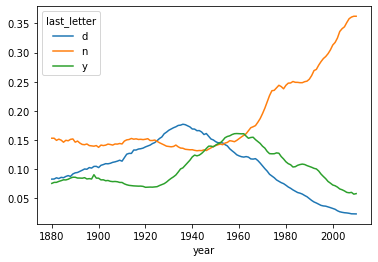

In [48]:
dny_ts.plot()

# Boy names that became girl names (and vice versa)

Another fun trend is looking at names that were more popular with one gender earlier in the sample but have become preferred as a name for the other gender over time. One example is the name Lesley or Leslie. Going back to the top1000  DataFrame, I compute a list of names occurring in the dataset starting with "Lesl":

In [49]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


# Cleaning the data

In [50]:
all_names=pd.Series(top1000["name"].unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6865       Daylen
6866        Masen
6867        Rowen
6868       Yousef
6869       Joziah
Length: 6870, dtype: object

In [51]:
lesley_like= all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

From there, we can filter down to just those names and sum births grouped by name to see the relative frequencies:

In [52]:
filtered=top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    370581
Lesly      10072
Name: births, dtype: int64

Next, let’s aggregate by sex and year, and normalize within year:

In [53]:
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256326,Lesly,F,699,2008,0.000370
258035,Leslie,F,1982,2009,0.001080
258380,Lesly,F,598,2009,0.000326
260074,Leslie,F,1565,2010,0.000881


# Transforming the data

In [54]:
#pivot_table()

In [55]:
table= filtered.pivot_table("births", index="year", columns="sex", aggfunc="sum")
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4168.0,NaN
2007,3808.0,NaN
2008,3024.0,NaN


In [56]:
#div()

In [57]:
table=table.div(table.sum(axis="columns"), axis="index")
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


Lastly, it’s now possible to make a plot of the breakdown by sex over time

# Visualizing the data

<AxesSubplot:xlabel='year'>

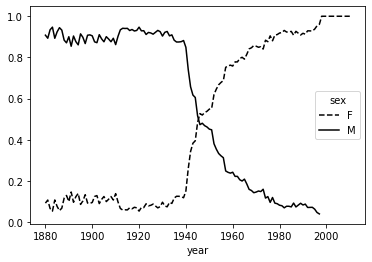

In [58]:
table.plot(style={"M": "k-", "F":"k--"})